In [8]:
import os
import datetime
from time import sleep

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import mse

DEBUG=True
start = datetime.datetime.now()

# carrega o conjunto de dados
if DEBUG:
    machine = 'debug'
    workload = pd.DataFrame({'cpu':[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13,  15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86,  88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99,
                                   100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199,
                                   200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269, 271, 272, 273, 274, 275, 276, 278, 279, 280, 281, 282, 283, 284, 285, 286, 288, 289, 290, 291, 292, 293, 295, 296, 297, 298, 299,
                                   300, 301, 302, 303, 304, 305, 307, 308, 309, 310, 311, 312, 313, 315, 316, 317, 318, 319, 320, 322, 323, 324, 325, 326, 328, 329, 330, 331, 332, 333, 334, 336, 337, 338, 339, 340, 341, 342, 344, 345, 346, 347, 348, 349, 350, 352, 353, 354, 355, 356, 357, 358, 359, 360, 362, 363, 364, 365, 366, 367, 368, 369, 371, 372, 373, 374, 375, 376, 378, 379, 380, 381, 382, 383, 384, 385, 386, 388, 389, 390, 391, 392, 393, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 407, 408, 409, 410, 411, 412, 413, 415, 416, 417, 418, 419, 420, 422, 423, 424, 425, 426, 428, 429, 430, 431, 432, 433, 434, 436, 437, 438, 439, 440, 441, 442, 444, 445, 446, 447, 448, 449, 450, 452, 453, 454, 455, 456, 457, 458, 459, 460, 462, 463, 464, 465, 466, 467, 468, 469, 471, 472, 473, 474, 475, 476, 478, 479, 480, 481, 482, 483, 484, 485, 486, 488, 489, 490, 491, 492, 493, 495, 496, 497, 498, 499, 
                                   500, 501, 502, 503, 504, 505, 507, 508, 509, 510, 511, 512, 513, 515, 516, 517, 518, 519, 520, 522, 523, 524, 525, 526, 528, 529, 530, 531, 532, 533, 534, 536, 537, 538, 539, 540, 541, 542, 544, 545, 546, 547, 548, 549, 550, 552, 553, 554, 555, 556, 557, 558, 559, 560, 562, 563, 564, 565, 566, 567, 568, 569, 571, 572, 573, 574, 575, 576, 578, 579, 580, 581, 582, 583, 584, 585, 586, 588, 589, 590, 591, 592, 593, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 607, 608, 609, 610, 611, 612, 613, 615, 616, 617, 618, 619, 620, 622, 623, 624, 625, 626, 628, 629, 630, 631, 632, 633, 634, 636, 637, 638, 639, 640, 641, 642, 644, 645, 646, 647, 648, 649, 650, 652, 653, 654, 655, 656, 657, 658, 659, 660, 662, 663, 664, 665, 666, 667, 668, 669, 671, 672, 673, 674, 675, 676, 678, 679, 680, 681, 682, 683, 684, 685, 686, 688, 689, 690, 691, 692, 693, 695, 696, 697, 698, 699,
                                   700, 701, 702, 703, 704, 705, 707, 708, 709, 710, 711, 712, 713, 715, 716, 717, 718, 719, 720, 722, 723, 724, 725, 726, 728, 729, 730, 731, 732, 733, 734, 736, 737, 738, 739, 740, 741, 742, 744, 745, 746, 747, 748, 749, 750, 752, 753, 754, 755, 756, 757, 758, 759, 760, 762, 763, 764, 765, 766, 767, 768, 769, 771, 772, 773, 774, 775, 776, 778, 779, 780, 781, 782, 783, 784, 785, 786, 788, 789, 790, 791, 792, 793, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 807, 808, 809, 810, 811, 812, 813, 815, 816, 817, 818, 819, 820, 822, 823, 824, 825, 826, 828, 829, 830, 831, 832, 833, 834, 836, 837, 838, 839, 840, 841, 842, 844, 845, 846, 847, 848, 849, 850, 852, 853, 854, 855, 856, 857, 858, 859, 860, 862, 863, 864, 865, 866, 867, 868, 869, 871, 872, 873, 874, 875, 876, 878, 879, 880, 881, 882, 883, 884, 885, 886, 888, 889, 890, 891, 892, 893, 895, 896, 897, 898, 899, 
                                   900, 901, 902, 903, 904, 905, 907, 908, 909, 910, 911, 912, 913, 915, 916, 917, 918, 919, 920, 922, 923, 924, 925, 926, 928, 929, 930, 931, 932, 933, 934, 936, 937, 938, 939, 940, 941, 942, 944, 945, 946, 947, 948, 949, 950, 952, 953, 954, 955, 956, 957, 958, 959, 960, 962, 963, 964, 965, 966, 967, 968, 969, 971, 972, 973, 974, 975, 976, 978, 979, 980, 981, 982, 983, 984, 985, 986, 988, 989, 990, 991, 992, 993, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1015, 1016, 1017, 1018, 1019, 1020, 1022, 1023, 1024, 1025, 1026, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1071, 1072, 1073, 1074, 1075, 1076, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1088, 1089, 1090, 1091, 1092, 1093, 1095, 1096, 1097, 1098, 1099
                                   ]})
else:
    machine = 'm_3330.csv'
    workload = pd.read_csv(machine, 
                 names = ['machine_id', 'time_stamp', 'cpu', 'mem', 'mem_gps', 
                          'mkpi', 'net_in', 'net_out', 'disk_io_percent'])
    workload.time_stamp = pd.to_datetime(workload.time_stamp, unit='s')
    workload.set_index('time_stamp', inplace=True)
    workload = workload.resample('1min').interpolate()
    
# Separa conjunto de treino e de teste dos dados de CPU
test_perc = 1/8
test_len = int(len(workload)*test_perc)
str_test_perc = f'{test_len/len(workload):0.2f}'
train_set = workload.cpu[:-test_len]
test_set = workload.cpu[-test_len:]

# normaliza os dados de treino
reshaped_train_set = np.reshape(train_set.values, (-1, 1)) # carrega os dados de CPU em 2D
normalizer = MinMaxScaler(feature_range = (0,1)) # normaliza os valores entre 0 e 1
normalized_train_set = normalizer.fit_transform(reshaped_train_set)


eps = [1]
dps = (0,0,0)
max_p, max_d, max_q = dps

params_set = []
for p in range(max_p+1):
    for d in range(max_d+1):
        for q in range(max_q+1):
            for epoch in eps:
                params_set.append((epoch, p/10,d/10,q/10))
models = []
errors = []
for params in params_set:
    
    # Parâmetros de treinamento da rede
    epochs = params[0]
    dropout1 = params[1]
    dropout2 = params[2]
    dropout3 = params[3]

    def raw(v):
        '''Formata strings que serão usadas no nome do modelo'''
        return str(v).replace('.csv','').replace('.','')

    model_name = f'saved_models/rnn_{raw(str_test_perc)}_{epochs}_{raw(dropout1)}_{raw(dropout2)}_{raw(dropout3)}_{raw(machine)}.keras'
    if os.path.isfile(model_name):
        ### Carrega o modelo existente
        regressor = load_model(model_name)
        models.append(regressor)
    else:
        ### Cria um novo modelo
        # Prepara os dados de entrada da rede
        epoch, d1, d2, d3 = params
        
        previsors = []
        expected_values = []

        for i in range(90,len(reshaped_train_set)):
            previsors.append(normalized_train_set[i-90:i,0]) # guarda listas de 90 valores (Ex: posições 0 a 89)
            expected_values.append(normalized_train_set[i,0])# guarda o valor seguinte da lista para a rede prever (Ex: posição 90)
        
        previsors, expected_values = np.array(previsors), np.array(expected_values)
        previsors = np.reshape(previsors,(previsors.shape[0], previsors.shape[1],1)) # [[previsors, expected_values]]  Novo shape: (train_len-90, 90, 1)

        # Configuração da rede
        regressor = Sequential()
        regressor.add(LSTM(units = 100,
                           return_sequences = True,
                           input_shape = (previsors.shape[1],1)))
        regressor.add(Dropout(d1))
        regressor.add(LSTM(units = 50,
                           return_sequences = True,))
        regressor.add(Dropout(d2))
        regressor.add(LSTM(units = 50))
        regressor.add(Dropout(d3))
        regressor.add(Dense(units = 1,
                            activation = 'linear'))
    
        # Treina a rede e cria o modelo
        regressor.compile(optimizer = 'rmsprop',
                          loss = 'mean_squared_error',
                          metrics = ['mean_absolute_error'])
        regressor.fit(previsors,
                      expected_values,
                      epochs = epoch,
                      batch_size = 32,
                      verbose=0)
        models.append(regressor)

        # Salva o modelo em um arquivo
        regressor.save(model_name)
        print(f"Modelo salvo em: '{model_name}' ")    
    
    # Carga do modelo e previsão
    inputs = test_set.values
    inputs = inputs.reshape(-1,1)
    inputs = normalizer.transform(inputs)

    predict = []
    for j in range(90,len(test_set)):
        predict.append(inputs[j-90:j, 0])
    predict = np.array(predict)
    predict = np.reshape(predict,
                         (predict.shape[0],
                          predict.shape[1],
                          1))
    predict = regressor.predict(predict)
    predict = normalizer.inverse_transform(predict)
    
    # Organiza resultados do modelo
    result = workload[-test_len+90:].copy()
    result['predict'] = predict[:]
    
    # valida o erro do modelo
    error = mse(result['cpu'], result['predict'])
    errors.append(error)
    print(f'{epoch} {params[1:]} {error}', end=' | ')
    
best_model = None
best_params = None
for model, params, error in zip(models, params_set, errors):
    best_error = min(errors)
    if error == best_error:
        best_model = model
        best_params = params 

print('\n\n')
print(f'Melhor resultado:\n\tÉpocas: {best_params[0]}\n\tDropouts: {tuple(best_params[1:])}\n\tErro: {best_error}')
lapsed = datetime.datetime.now() - start
print('Tempo: '+str(lapsed).split('.')[0])


1 (0.0, 0.0, 0.0) 52516.389885902405 | 


Melhor resultado:
	Épocas: 1
	Dropouts: (0.0, 0.0, 0.0)
	Erro: 52516.389885902405
Tempo: 0:00:04


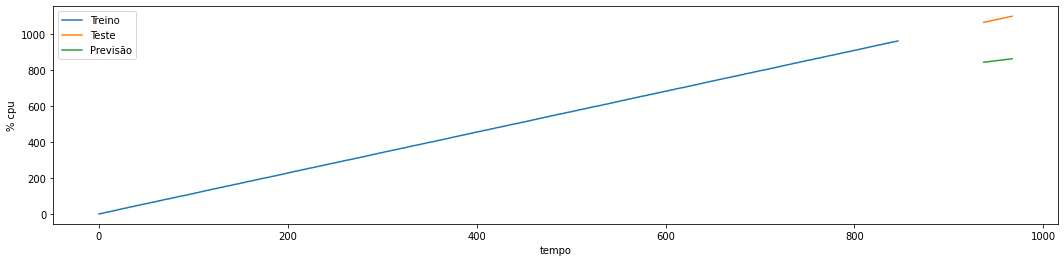

In [9]:
# recupera o melhor modelo
regressor = best_model

# Carga do modelo e previsão
result = workload[-test_len+90:].copy()
result['predict'] = predict[:]

plt.figure(figsize=(18,4))
plt.plot(train_set, label = 'Treino')
plt.plot(result['cpu'], label = 'Teste')
plt.plot(result['predict'], label = 'Previsão')
plt.xlabel('tempo')
plt.ylabel('% cpu')
plt.legend()
plt.show()

In [4]:
mse(result.cpu, result.predict)

447065.91888329614